In [28]:
import pandas as pd
import seaborn  as sns

In [3]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
retained = df[df["left"] == 0]
left = df[df["left"] == 1]

In [23]:
df.groupby(['left'])[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


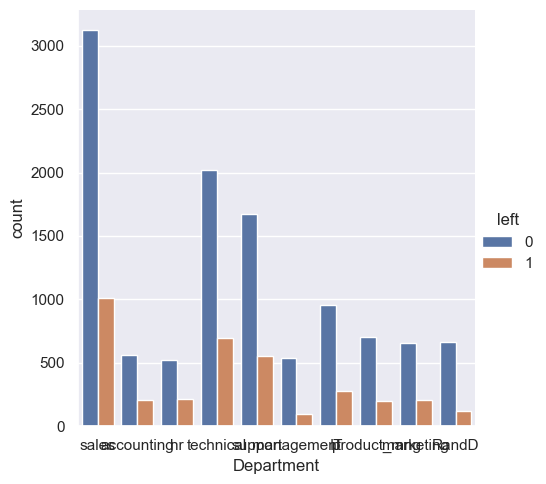

In [46]:
sns.catplot(x="Department",hue="left", kind="count", data=df)


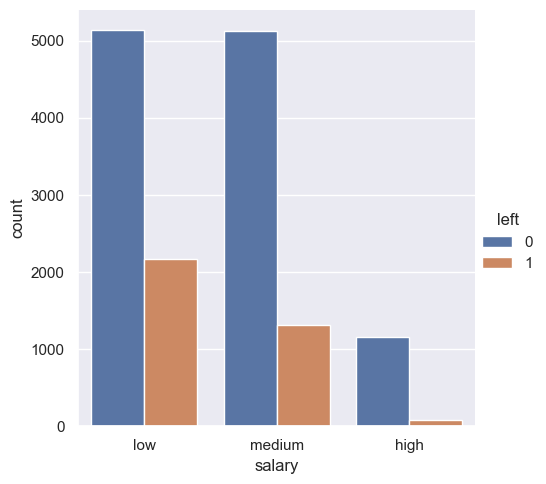

In [47]:
sns.catplot(x="salary",hue="left", kind="count", data=df)

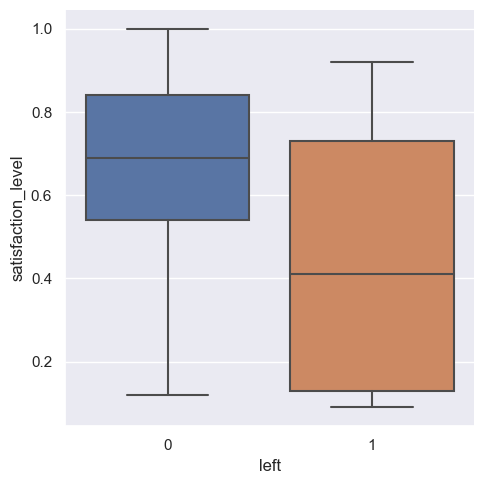

In [51]:
sns.catplot(x="left",y="satisfaction_level", kind="box", data=df)

In [60]:
mapping_dictionary_value={'low':0,'medium':1,'high':2}
df['salary_ordinal']=df.salary.map(mapping_dictionary_value)

In [78]:
X = df[['satisfaction_level', 'last_evaluation',
       'average_montly_hours','number_project','time_spend_company',
       'salary_ordinal']]
Y = df["left"]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.3)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [81]:
model.fit(X_train,y_train)

LogisticRegression()

In [82]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [83]:
model.score(X_test,y_test)

0.7668571428571429